# Lab-6:
## Exercise-2:

> Importing necessary libraries

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
sb.set_theme()

In [251]:
cancer = pd.read_csv('cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [252]:
cancer.shape

(569, 33)

In [253]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [254]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [255]:
cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [256]:
cancer = cancer.drop('Unnamed: 32', axis=1)

#### Question-1: Write down the meta information about the “cancer.csv” data set available in the UCI repository, https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

<pre>
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/
</pre>

> #### Meta Data:
>
>1) ID number <br>
> 2) Diagnosis (M = malignant, B = benign)<br>
> 3-32)<br>
><br>
> Ten real-valued features are computed for each cell nucleus:<br>
><br>
> a) radius (mean of distances from center to points on the perimeter)<br>
> b) texture (standard deviation of gray-scale values)<br>
> c) perimeter<br>
> d) area<br>
> e) smoothness (local variation in radius lengths)<br>
> f) compactness (perimeter^2 / area - 1.0)<br>
> g) concavity (severity of concave portions of the contour)<br>
> h) concave points (number of concave portions of the contour)<br>
> i) symmetry<br>
> j) fractal dimension ("coastline approximation" - 1)<br>
><br>
>.

#### Question-2: Tabulate and visualize the distribution of the numeric variables.

In [257]:
numerical_features = [column_name for column_name in cancer.columns if cancer[column_name].dtype != 'O']

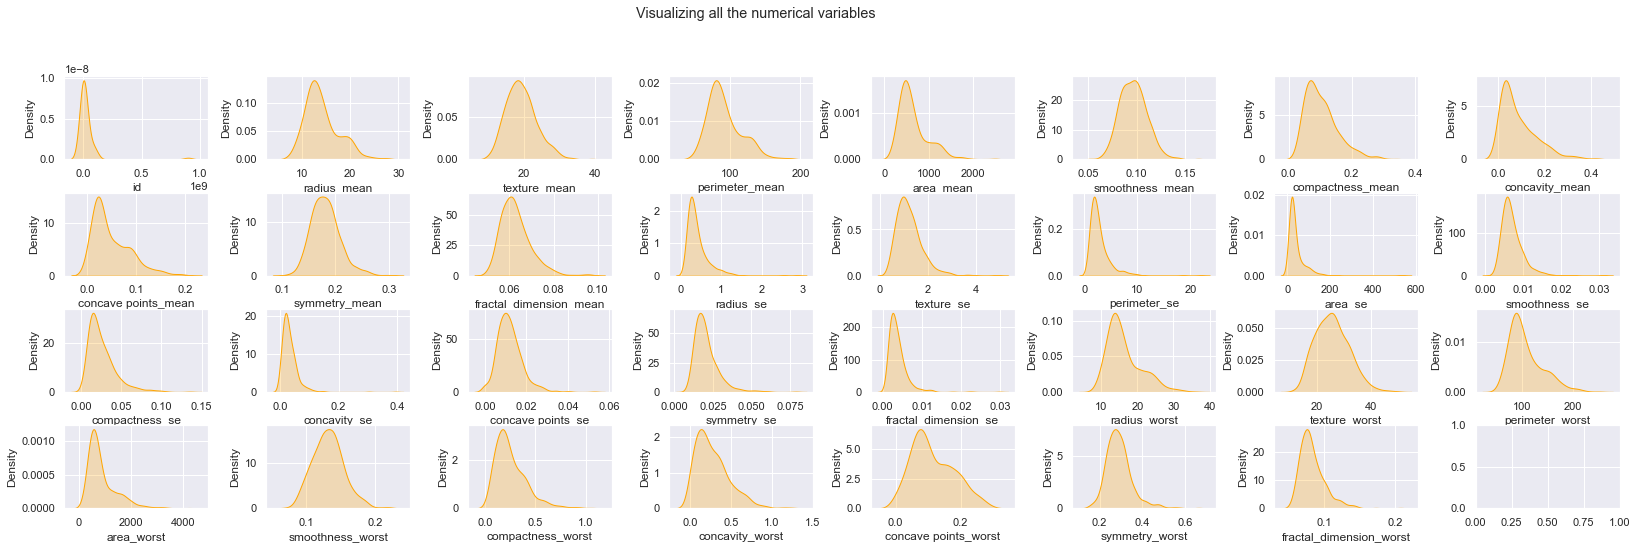

In [258]:
fig, axes = plt.subplots(4,8, figsize=(24,12))
fig.suptitle("Visualizing all the numerical variables")
counter = 0
for i in range(4):
    for j in range(8):
        if i==3 and j==7:
            break
        sb.kdeplot(ax=axes[i,j], data=cancer, x=cancer[numerical_features[counter]], shade=True, color='orange')
        counter = counter+1
plt.subplots_adjust(left=0.1,
                    bottom=0.4, 
                    right=1.0, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


#### Question-3:  Perform the required preprocessing , 70,30 split and build a classifier using the SVM model available in SciKit Learn.
#### Question-4: Tune the hyperparameters of kernel (linear, polynomial, and radial basis), regularization and gamma. Tabulate the model performance and comment on the best model found for the given dataset.

In [259]:
X = cancer.drop('diagnosis', axis=1)
y = cancer['diagnosis']

> Scaling the data:

In [260]:
sc = StandardScaler()

In [261]:
X = pd.DataFrame(sc.fit_transform(X))

> Encoding the data:

In [262]:
le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(y))

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

> Building the SVM model:

In [264]:
depth_range = np.linspace(1, 10, num=10)
svc = SVC(random_state=42)
parameters = {'kernel':('linear', 'poly', 'rbf'), 'C':depth_range, 'gamma': ('scale', 'auto')}
clf = GridSearchCV(estimator=svc, param_grid=parameters, cv=10, n_jobs=-1, scoring='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf')},
             scoring='roc_auc')

In [265]:
svc.set_params(**clf.best_params_)

SVC(C=3.0, random_state=42)

> Fitting the model

In [266]:
svc.fit(X_train, y_train)

SVC(C=3.0, random_state=42)

In [267]:
y_pred = svc.predict(X_test)

> Accuracy Score:

In [268]:
accuracy_score(y_test, y_pred)

0.9824561403508771

In [269]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

